In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot

In [ ]:
dataset = pd.read_csv('ML.csv')

In [ ]:
dataset.describe()

,sourceid,destinationid,amountofmoney,isfraud
count,2340.000000,2340.000000,2.340000e+03,2340.000000
mean,49111.255128,52257.918803,2.508583e+06,0.597863
std,29614.440603,28988.847246,2.560434e+06,0.490434
min,61.000000,53.000000,1.333200e+04,0.000000
25%,24033.000000,28046.000000,3.359140e+05,0.000000
50%,46632.500000,52748.500000,1.162354e+06,1.000000
75%,75107.000000,78030.000000,4.686559e+06,1.000000
max,100000.000000,99950.000000,7.952497e+06,1.000000


In [ ]:
print(dataset.columns)

Index(['typeofaction', 'sourceid', 'destinationid', 'amountofmoney', 'date',
       'isfraud', 'typeoffraud'],
      dtype='object')


In [ ]:
print('Null Values =',dataset.isnull().values.any())

Null Values = False


In [ ]:
print(dataset.isfraud.value_counts().rename(index = {0:'no Fraud', 1:'is Fraud'}))

is Fraud    1399
no Fraud     941
Name: isfraud, dtype: int64


In [ ]:
print(dataset.typeofaction.value_counts())

transfer    1580
cash-in      760
Name: typeofaction, dtype: int64


In [ ]:
# FEATURE SELECTION
features = dataset[['typeofaction','amountofmoney']]
target = dataset['isfraud']

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(target)

LabelEncoder()

In [ ]:
y_values = le.transform(target)

In [ ]:
def category_to_number(target):
    from sklearn import preprocessing
    le = preprocessing.LabelEncoder()
    le.fit(target)
    print(le.classes_)
    print("----->")
    print(le.transform(le.classes_))
    return(le.transform(target))

In [ ]:
typeofaction_values = category_to_number(dataset['typeofaction'])

['cash-in' 'transfer']
----->
[0 1]


In [ ]:
features_numeric = { 'typeofaction': typeofaction_values,
                    'amountofmoney' : dataset['amountofmoney']}
features_numeric = pd.DataFrame(features_numeric)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features_numeric, target, random_state=22)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train);

In [ ]:
y_pred = knn.predict(X_test)
y_pred == y_test

1110    True
2079    True
1960    True
639     True
1419    True
        ... 
110     True
1974    True
1867    True
301     True
865     True
Name: isfraud, Length: 585, dtype: bool

In [ ]:
np.mean(y_pred == y_test)

0.976068376068376

In [ ]:
knn.score(X_test, y_test)

0.976068376068376

In [ ]:
sum(y_train)/len(y_train) * 100

60.22792022792023

In [ ]:
y_test

1110    1
2079    0
1960    0
639     1
1419    0
       ..
110     1
1974    0
1867    0
301     1
865     1
Name: isfraud, Length: 585, dtype: int64

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
knn_cv = KNeighborsClassifier(n_neighbors=1)

In [ ]:
cv_scores = cross_val_score(knn_cv, features_numeric, y_values, cv=3)

In [ ]:
print(cv_scores)

[0.48717949 0.60897436 0.60384615]


In [ ]:
print('cv_scores mean:{}'.format(np.mean(cv_scores)))

cv_scores mean:0.5666666666666665


In [ ]:
scoring = 'accuracy'

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV

In [ ]:
models = []
models.append(('LR', LogisticRegression(max_iter=1000)))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))

In [ ]:
num_folds = 10
seed = 22
results = []
names = []

In [ ]:
for name, model in models:
    kfold = KFold(n_splits=num_folds, shuffle=True, random_state=seed)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.602282 (0.032302)
LDA: 0.602282 (0.032302)
KNN: 0.934477 (0.023111)
CART: 0.978932 (0.012203)


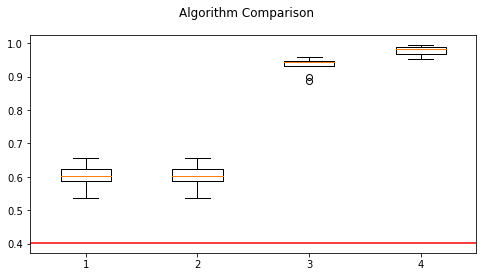

In [ ]:
#visualise the results
# compare algorithms
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
pyplot.axhline(y=dataset.isfraud.value_counts(1)[0], color='r', linestyle='-')
fig.set_size_inches(8,4)

In [ ]:
dataset.isfraud.value_counts()
dataset.isfraud.value_counts(1)[0]

0.40213675213675215

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
# prepare model
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
# estimate accuracy on validation set
predictions = model.predict(X_test)
print(accuracy_score(y_test, predictions))
print(classification_report(y_test, predictions))
# confusion matrix


0.9880341880341881
              precision    recall  f1-score   support

           0       1.00      0.97      0.99       243
           1       0.98      1.00      0.99       342

    accuracy                           0.99       585
   macro avg       0.99      0.99      0.99       585
weighted avg       0.99      0.99      0.99       585



In [ ]:
df_cm = pd.DataFrame(confusion_matrix(y_test, predictions), \
    columns=np.unique(y_test), index = np.unique(y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
print(df_cm)

Predicted    0    1
Actual             
0          236    7
1            0  342
